In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gender_bias_dataset_5000_with_features.csv to gender_bias_dataset_5000_with_features.csv


In [ ]:
df = pd.read_csv("gender_bias_dataset_5000_with_features.csv")
df.head()

Job_Title        Department Experience_Level  \
0  Customer Support Agent  Customer Support            Entry   
1         Sales Executive         Marketing              Mid   
2   Marketing Coordinator             Sales            Entry   
3  Customer Support Agent         Marketing           Senior   
4             Team Leader             Sales            Entry   

                                     Job_Description  Label  
0           Seeking a fearless and tough individual.      1  
1  Looking for a salesman with a go-getter attitude.      1  
2  Applicants of all genders are encouraged to ap...      0  
3      The candidate must be dominant and assertive.      1  
4         We need a man who can handle the pressure.      1

In [ ]:
df['Text'] = df['Job_Title'] + " " + df['Department'] + " " + df['Experience_Level'] + " " + df['Job_Description']

In [ ]:
X = df['Text']
y = df['Label']

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_vec = vectorizer.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       1.00      1.00      1.00       524

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



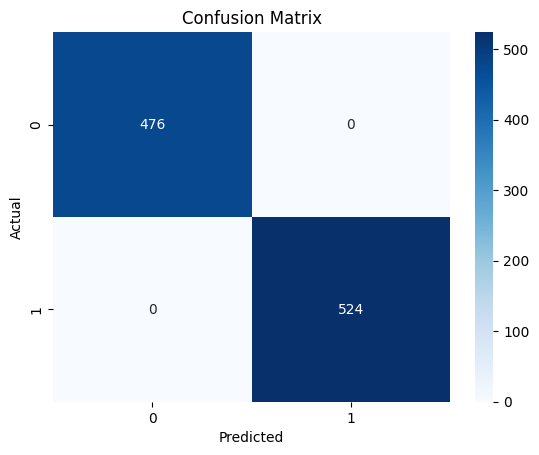

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
def predict_bias(text):
    text_vec = vectorizer.transform([text])
    prediction = model.predict(text_vec)[0]
    return "Biased" if prediction == 1 else "Unbiased"

In [ ]:
sample = "We need a strong and aggressive leader to dominate the sales team."
print("Prediction:", predict_bias(sample))

Prediction: Biased


In [ ]:
# Function to predict bias in custom job text
def predict_bias(text):
    text_vec = vectorizer.transform([text])
    prediction = model.predict(text_vec)[0]
    return "Biased" if prediction == 1 else "Unbiased"

# 🔍 Try with your own job description text
test_input = input("Enter a job description: ")
print("Prediction:", predict_bias(test_input))


Enter a job description: "Candidates must be nurturing and cooperative, ideal for women."
Prediction: Unbiased


In [ ]:
# Function to predict bias in custom job text
def predict_bias(text):
    text_vec = vectorizer.transform([text])
    prediction = model.predict(text_vec)[0]
    return "Biased" if prediction == 1 else "Unbiased"

# 🔍 Try with your own job description text
test_input = input("Enter a job description: ")
print("Prediction:", predict_bias(test_input))

Enter a job description: "We are looking for a strong, dominant man to lead our team.
Prediction: Biased
